<a href="https://colab.research.google.com/github/nofarmordehai/four_pics_in_one/blob/master/four_pics_in_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Four-step tutorial and code**

**How to paste 4 images into 1 image ? but for many images at once ! from Google Drive folder.**

**Step 0:**
Run the following two lines; import the necessary libraries and connect to your Google Drive.

In [ ]:
from PIL import Image
from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Step 1:**
Change source folder and destination folder to yours folders in Google Drive.

To avoid complications check that the source folder has **only images** and also that the number of images is **divided by four**.


In [ ]:
src_path = "/content/drive/My Drive/Colab Notebooks/four/src" # "/content/drive/My Drive/... complete your src path

list_of_images = [src_path + "/" + i for i in listdir(src_path) if isfile(join(src_path, i))]

dest_path = "/content/drive/My Drive/Colab Notebooks/four/dest" # "/content/drive/My Drive/... complete your dest path

**Step 2:**
Resize all images. 

The most common size for a printed photo is 4 inches by 6 inches.

A little research reveals that it fits the image dimensions of 1800 X 1200 in pixels.

so if we want 4 images in 1, every image need image dimensions of 900 X 600 in pixels.

In [ ]:
def resize_img(img_path):
    im = Image.open(img_path)
    width, length = im.size
    if width < length:
        im = im.transpose(Image.ROTATE_90)
    new = im.resize((900,600), Image.ANTIALIAS)
    new.save(img_path)

In [ ]:
# resize all images inplace
for img in list_of_images:
    resize_img(img)

Example: look at this screenshot after resize, you can see how 1 & 3 stretched.


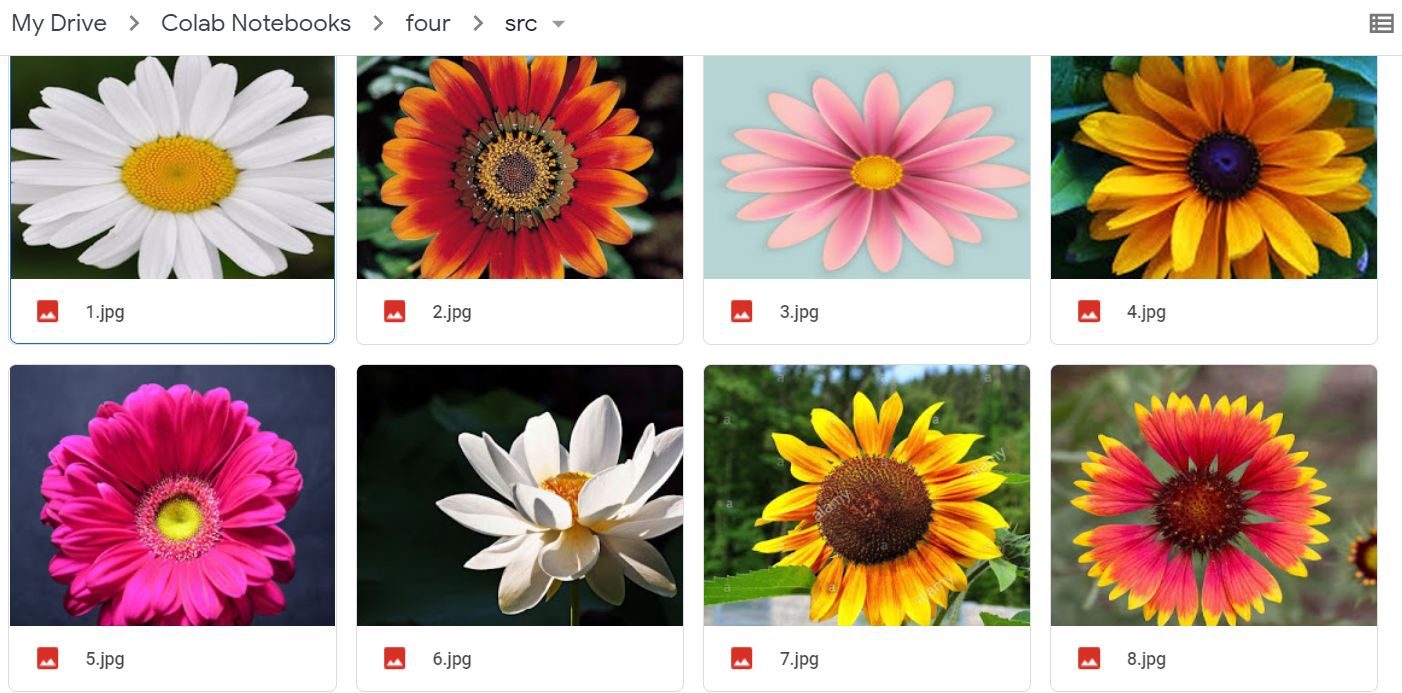



**Step 3:**
Collage time. 

In [ ]:
def create_collage(list_of_images):
    new_img = Image.new("RGB", (1800, 1200))
    i = 0
    count = 1
    while i < len(list_of_images):
        new_img.paste(Image.open(list_of_images[i]), (0, 0))
        new_img.paste(Image.open(list_of_images[i+1]), (0, 600))
        new_img.paste(Image.open(list_of_images[i+2]), (900,0))
        new_img.paste(Image.open(list_of_images[i+3]), (900, 600))
        new_img.save(dest_path + "/" + str(count) + ".jpg")
        i = i + 4
        count = count + 1

In [ ]:
create_collage(list_of_images) 

Check the destination folder, it has some new collages now. :) !

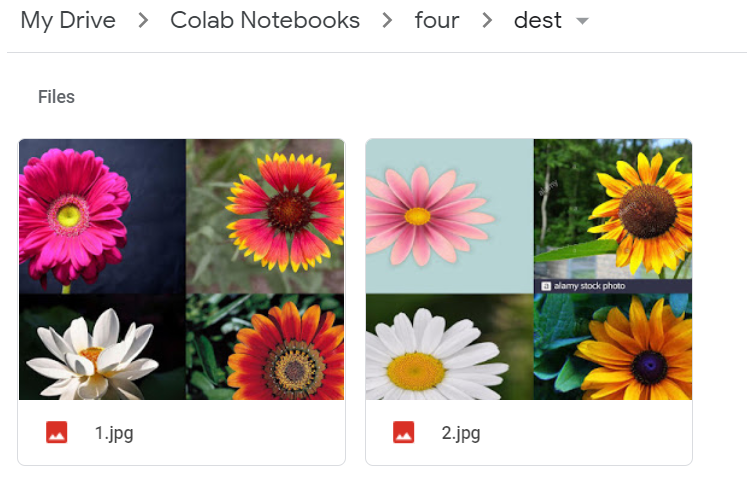